### Install

In [8]:
%pip install pandas
%pip install catboost
%pip install scikit-learn
%pip install torch

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import os
import random
import matplotlib.pyplot as plt

# [Base Repo](https://git.codenrock.com/siam-ml-hack-1359/cnrprod1740766582-team-83332/zagruzka-koda-proekta-6529)
read this
# Data
[Train Data](https://storage.codenrock.com/companies/codenrock-13/contests/siam-ml-hack/data.zip) as Data/data/*  \
[Markup Train Data](https://storage.codenrock.com/companies/codenrock-13/contests/siam-ml-hack/markup_train.csv) as Data/markup_train.csv \
[High Qualiti Train Data](https://storage.codenrock.com/companies/codenrock-13/contests/siam-ml-hack/hq_markup_train.csv) as Data/hq_markup_train.csv \
[Test Data](https://storage.codenrock.com/companies/codenrock-13/contests/siam-ml-hack/validation%201.zip) as Data/validation 1/* \

install all of this



In [ ]:
hq_train_data_path = "./Data/hq_markup_train.csv"
lq_train_data_path = "./Data/markup_train.csv"


hq_train_data = pd.read_csv(hq_train_data_path)


# Данные
X - временной ряд(находится в файле по имени `train_data['file_name'])`). Представляет из себя 3 значение(время, ΔP (атм) P′ (атм)) \
Y - 15 признаков, 8 биномиальные а 7 их численная характеристика на графике. \
Более подробно читайте в репе

In [11]:
hq_train_data

,file_name,department_name,user_name,Некачественное ГДИС,Влияние ствола скважины,Радиальный режим,Линейный режим,Билинейный режим,Сферический режим,Граница постоянного давления,Граница непроницаемый разлом,Влияние ствола скважины_details,Радиальный режим_details,Линейный режим_details,Билинейный режим_details,Сферический режим_details,Граница постоянного давления_details,Граница непроницаемый разлом_details
0,e9c7e07f-b723-4da3-918e-7dbcb360c830,department2,user5,0,1,1,0,0,0,0,1,2.082030,0.109087,NaN,NaN,NaN,NaN,4.647373
1,726565c9-e05b-4a28-9079-22d94f9bb9e2,department3,user4,0,1,1,1,0,0,0,0,2.714919,1.220888,1.353544,NaN,NaN,NaN,NaN
2,c2a4d43d-5a93-4c37-81b6-d4fdc5b0280b,department3,user5,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15e04219-9fa0-401d-8b42-833b71ccafb3,department3,user5,0,1,1,0,0,0,0,0,1.909838,1.569424,NaN,NaN,NaN,NaN,NaN
4,d43f459d-97fa-4ab0-bacc-43e2cb73e1b9,department1,user1,0,1,1,1,0,0,0,0,1.298287,1.140658,0.387881,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,a0448188-be5d-4ad6-929f-1870710e224b,department3,user4,0,1,1,0,0,1,0,0,2.127852,0.127861,NaN,NaN,0.774477,NaN,NaN
496,c295e7be-009c-4893-94c0-194d449077ed,department2,user5,0,1,1,0,0,0,1,0,3.084138,-0.304834,NaN,NaN,NaN,50.469566,NaN
497,ac06114e-e466-497a-a0b7-5166d784140e,department2,user5,0,1,0,0,0,0,0,1,0.009126,NaN,NaN,NaN,NaN,NaN,122.084111
498,0fd9d92c-a6d6-44c2-80b2-7f3cfcbea3da,department3,user5,0,1,1,0,1,0,1,0,2.328356,1.640163,NaN,1.291103,NaN,292.072213,NaN


In [ ]:
def get_train_data(file_name: str, train=True) -> pd.DataFrame | None:
    """
    Загружает данные из файла с указанным UUID в DataFrame

    Параметры:
    uuid (str): Идентификатор файла
    data_dir (str): Путь к папке с данными (по умолчанию 'data')

    Возвращает:
    pd.DataFrame: DataFrame с колонками ['Time', 'DeltaP', 'P_prime']
    или None если файл не найден
    """
    if train:
        file_path = os.path.join("Data/data", file_name)
    else:
        file_path = os.path.join("Data/validation 1", file_name)
    try:
        df = pd.read_csv(
            file_path,
            sep="\t",
            header=None,
            names=["Time", "DeltaP", "P_prime"],
            dtype={"Time": "float32", "DeltaP": "float32", "P_prime": "float32"},
            engine="c",
        )
        return df
    except FileNotFoundError as x:
        print(f"File not found in path:\t {file_path}\n" + x)
        return None

def get_train_data_from_loc(loc:pd.Series, train=True)->pd.DataFrame | None:
    return get_train_data(loc['file_name'])

# print(get_train_data('e9c7e07f-b723-4da3-918e-7dbcb360c830')) # work
# print(get_train_data_from_loc(hq_train_data.iloc[1])) # work

          Time      DeltaP    P_prime
0     0.000137    0.010783   1.777265
1     0.020137    8.882369  13.893935
2     0.030137   14.878979  10.931179
3     0.050137   17.910307   5.991131
4     0.070137   19.929394   6.945928
..         ...         ...        ...
177  30.920137  106.087029  16.037609
178  31.920137  106.521034  16.376270
179  32.920135  107.023788  16.575186
180  33.920135  107.488792  17.133892
181  34.920135  108.071068  14.852910

[182 rows x 3 columns]


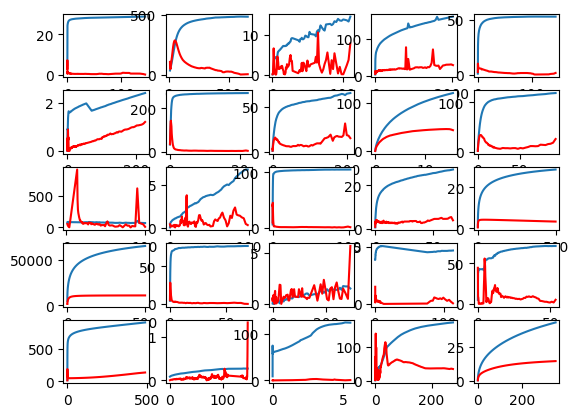

In [ ]:
# Show some time series


subplot = (5, 5)
random_rows = hq_train_data.sample(n=subplot[0] * subplot[1], random_state=42)
series = [get_train_data_from_loc(d) for d in random_rows.iloc] 
for i, v in enumerate(series):
    plt.subplot(*subplot, i+1)
    plt.plot(v['Time'], v['DeltaP'])
    plt.plot(v['Time'], v['P_prime'], color='r')
plt.show()

In [ ]:
# for all target show where it is true
hq_train_data_t = hq_train_data.drop(["department_name", "user_name"], axis=1)
for t in hq_train_data_t.columns[2:9]:
    target = hq_train_data_t[['file_name', t, t+'_details']].dropna()
    break



                                file_name  Влияние ствола скважины  \
0    e9c7e07f-b723-4da3-918e-7dbcb360c830                        1   
1    726565c9-e05b-4a28-9079-22d94f9bb9e2                        1   
3    15e04219-9fa0-401d-8b42-833b71ccafb3                        1   
4    d43f459d-97fa-4ab0-bacc-43e2cb73e1b9                        1   
7    65482016-39dd-45b9-8c9d-f602ab64eaed                        1   
..                                    ...                      ...   
495  a0448188-be5d-4ad6-929f-1870710e224b                        1   
496  c295e7be-009c-4893-94c0-194d449077ed                        1   
497  ac06114e-e466-497a-a0b7-5166d784140e                        1   
498  0fd9d92c-a6d6-44c2-80b2-7f3cfcbea3da                        1   
499  b145d37a-2b67-47e1-b4d4-a70a59192187                        1   

     Влияние ствола скважины_details  
0                           2.082030  
1                           2.714919  
3                           1.909838  
4  